# ...............EXPLORATORY DATA ANALYSIS(with visualisation)....................

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
#loading dataset:-
bank=pd.read_csv(r'C:/Users/swade/Desktop/verzeo/Bank.csv',sep=';')

#### Bank Marketing
Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Bank client data:

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Contact: contact communication type (categorical:'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')

Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric).

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [3]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
bank.shape

(41188, 21)

In [5]:
bank.insert(loc=0,column='customer id',value=range(41188)) #creating customer id column.

In [6]:
bank.head()

,customer id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#CHECKING NULL VALUES
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer id     41188 non-null  int32  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

In [8]:
bank.columns

Index(['customer id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [10]:
bank.describe()

,customer id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20593.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10296.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20593.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30890.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


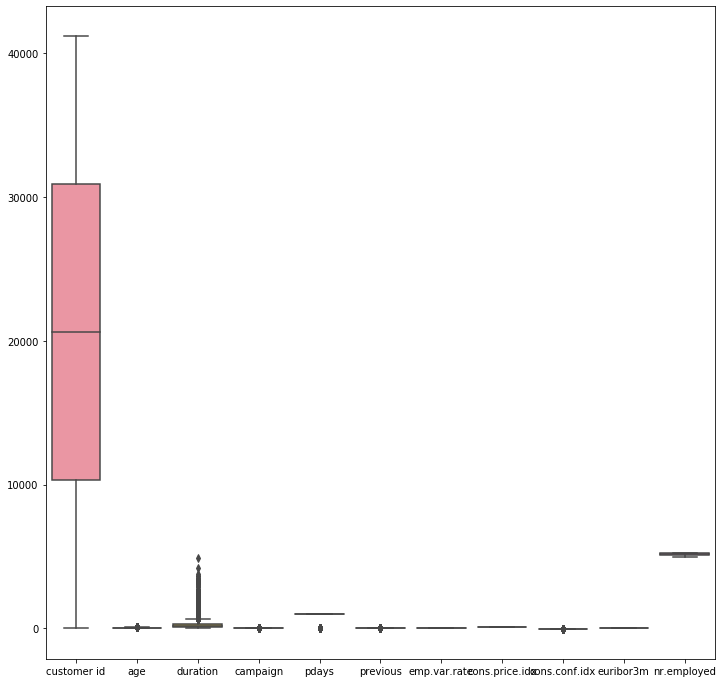

In [11]:
#Checking Outliers
%matplotlib inline
plt.rcParams['figure.figsize']=12,12
sns.boxplot(data=bank)

###   ---SOME QUESTIONS ON THE BANK DATASET---

1) Which profession has maximum number of people who haven't subscribe a term deposit?

In [12]:
df=bank.loc[:,['job','y']]
df

,job,y
0,housemaid,no
1,services,no
2,services,no
3,admin.,no
4,services,no
...,...,...
41183,retired,yes
41184,blue-collar,no
41185,retired,no
41186,technician,yes


In [13]:
df=df[df['y']=='no']
df

,job,y
0,housemaid,no
1,services,no
2,services,no
3,admin.,no
4,services,no
...,...,...
41180,admin.,no
41182,unemployed,no
41184,blue-collar,no
41185,retired,no


In [14]:
ser=df['job'].value_counts()
ser

admin.           9070
blue-collar      8616
technician       6013
services         3646
management       2596
entrepreneur     1332
retired          1286
self-employed    1272
housemaid         954
unemployed        870
student           600
unknown           293
Name: job, dtype: int64

In [15]:
#Hence, from above admin. job has maximum number of people who haven't subscribe a term deposit.

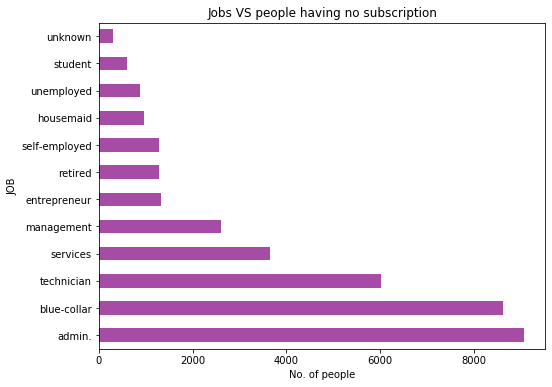

In [16]:
plt.rcParams['figure.figsize']=8,6
ser.plot(kind='barh',color='purple',alpha=0.7)
plt.xlabel('No. of people')
plt.ylabel('JOB')
plt.title('Jobs VS people having no subscription')
plt.show()

2) What is the maximum and minimum duration of last contact that results into subscription of term deposit?

In [17]:
df1=bank.loc[:,['customer id','job','duration','y' ]]
df1

,customer id,job,duration,y
0,0,housemaid,261,no
1,1,services,149,no
2,2,services,226,no
3,3,admin.,151,no
4,4,services,307,no
...,...,...,...,...
41183,41183,retired,334,yes
41184,41184,blue-collar,383,no
41185,41185,retired,189,no
41186,41186,technician,442,yes


In [18]:
df1=df1[df1['y']=='yes']
df1

,customer id,job,duration,y
75,75,blue-collar,1575,yes
83,83,entrepreneur,1042,yes
88,88,technician,1467,yes
129,129,technician,579,yes
139,139,blue-collar,461,yes
...,...,...,...,...
41174,41174,retired,208,yes
41178,41178,retired,483,yes
41181,41181,admin.,281,yes
41183,41183,retired,334,yes


In [19]:
df1.sort_values(by='duration',ascending=False)

,customer id,job,duration,y
22192,22192,blue-collar,4199,yes
13820,13820,technician,3643,yes
7727,7727,unemployed,3631,yes
12029,12029,retired,3183,yes
6280,6280,self-employed,3094,yes
...,...,...,...,...
38716,38716,admin.,64,yes
39124,39124,retired,63,yes
37726,37726,technician,63,yes
27742,27742,technician,63,yes


In [20]:
#Hence, from above maximum duration is 4199 sec whose customer id is 22192.
#minimum duration is 37 sec whose customer id is 24016.

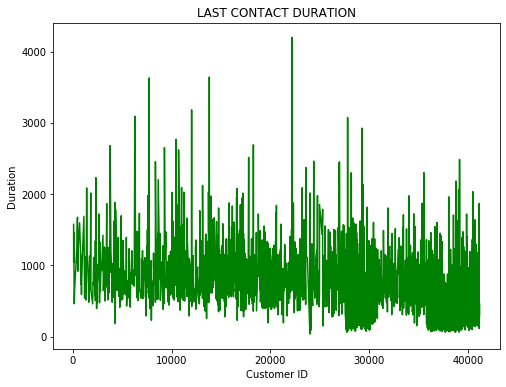

In [21]:
df1['duration'].plot(color='green')
plt.xlabel('Customer ID')
plt.ylabel('Duration')
plt.title('LAST CONTACT DURATION')
plt.show()

###  ---DATA VISUALISATION---

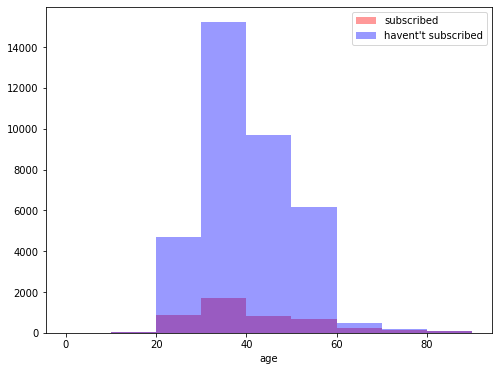

In [22]:
#Frequency count with age group:-
bins=range(0,100,10)
ax=sns.distplot(bank.age[bank.y=='yes'],color='red',bins=bins,label='subscribed',kde=False)
sns.distplot(bank.age[bank.y=='no'],ax=ax,color='blue',bins=bins,label="havent't subscribed",kde=False)
plt.legend()
plt.show()

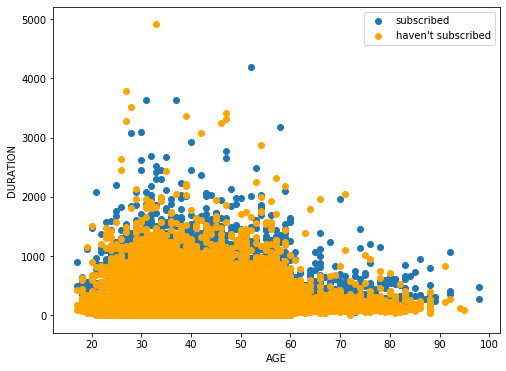

In [23]:
plt.scatter(x=bank.age[bank.y=='yes'],y=bank.duration[bank.y=='yes'])
plt.scatter(x=bank.age[bank.y=='no'],y=bank.duration[bank.y=='no'],color='orange')
plt.legend(['subscribed',"haven't subscribed"])
plt.xlabel('AGE')
plt.ylabel('DURATION')
plt.show()

In [24]:
data=bank.groupby(bank['month'])['customer id'].count()

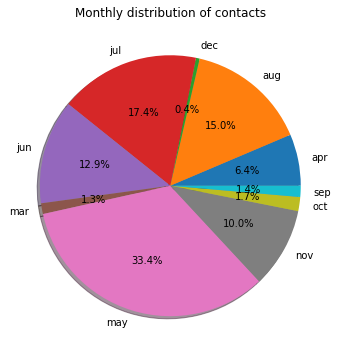

In [25]:
label=['apr','aug','dec','jul','jun','mar','may','nov','oct','sep']
plt.pie(data,labels=label,shadow=True,autopct='%1.1f%%')
plt.title('Monthly distribution of contacts')
plt.show()

In [26]:
bank=pd.read_csv(r'C:/Users/swade/Desktop/verzeo/Bank.csv',sep=';')

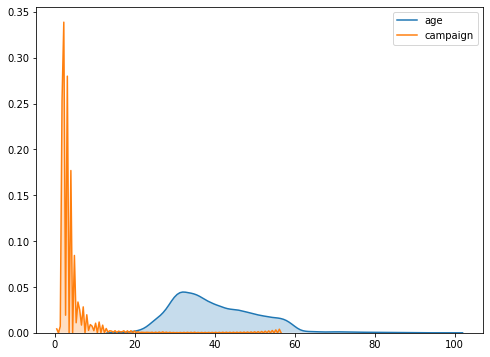

In [27]:
sns.kdeplot(bank['age'],shade=True)
sns.kdeplot(bank['campaign'],shade=True)

####     SYMMETRIC AND NON-SYMMETRIC

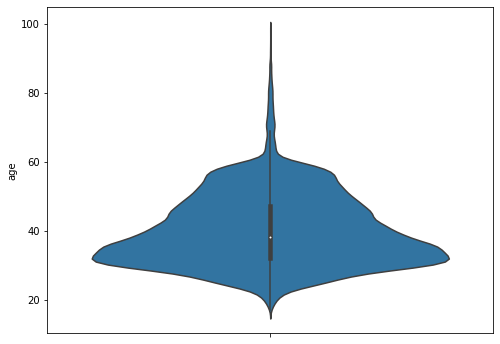

In [28]:
sns.violinplot(y='age',data=bank)

In [29]:
bank.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

####    CATEGORICAL VISUALISATION

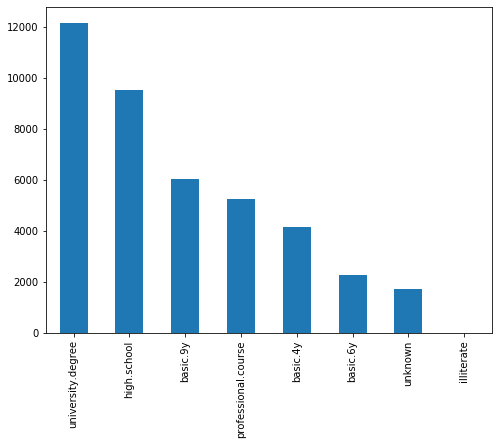

In [30]:
bank.education.value_counts().plot(kind='bar')

In [31]:
bank.contact.unique()

array(['telephone', 'cellular'], dtype=object)

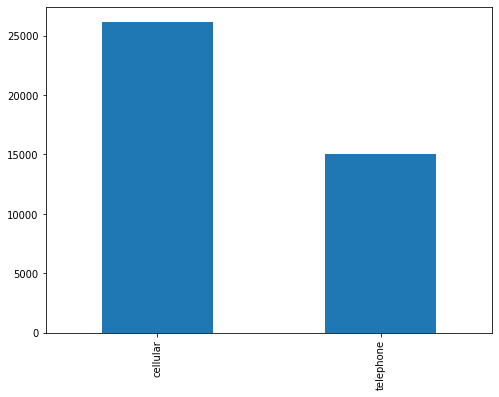

In [32]:
bank.contact.value_counts().plot(kind='bar')

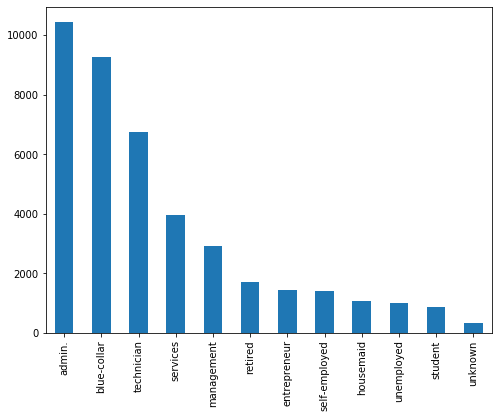

In [33]:
bank.job.value_counts().plot(kind='bar')

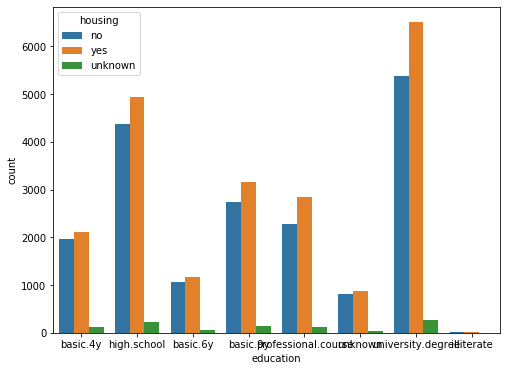

In [34]:
sns.countplot(x="education", data=bank, hue = 'housing')

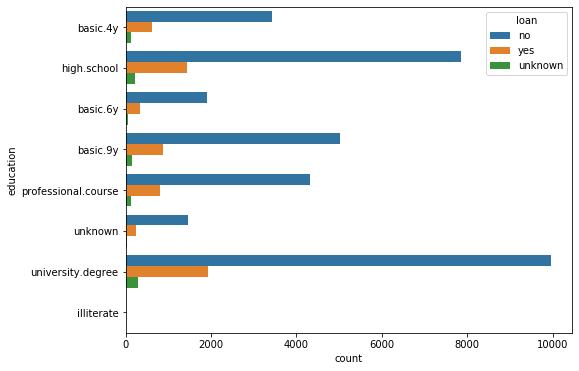

In [35]:
sns.countplot(y="education", data=bank,hue='loan')

####     NUMERIC-CATEGORICAL VISUALISATION

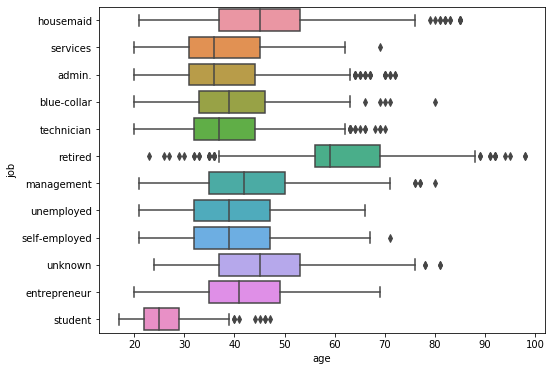

In [36]:
#sns.boxplot(x='age',data=bd)
sns.boxplot(x='age',y='job',data=bank)

####      CORRELATION AMONG FEATURES

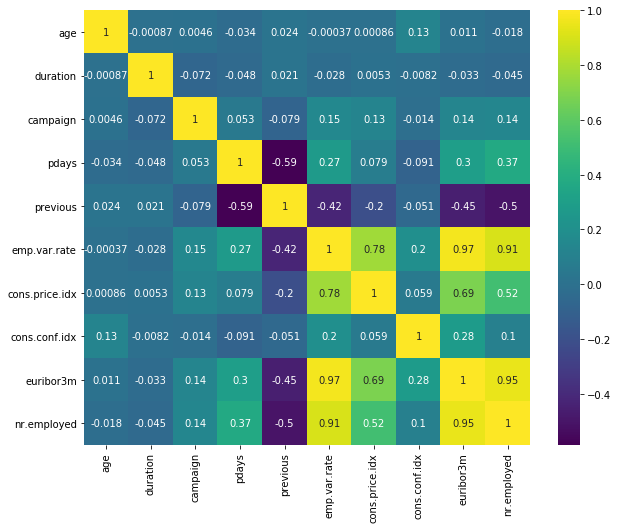

In [37]:
plt.rcParams['figure.figsize']=10,8
sns.heatmap(data=bank.corr(),annot=True,cmap='viridis')

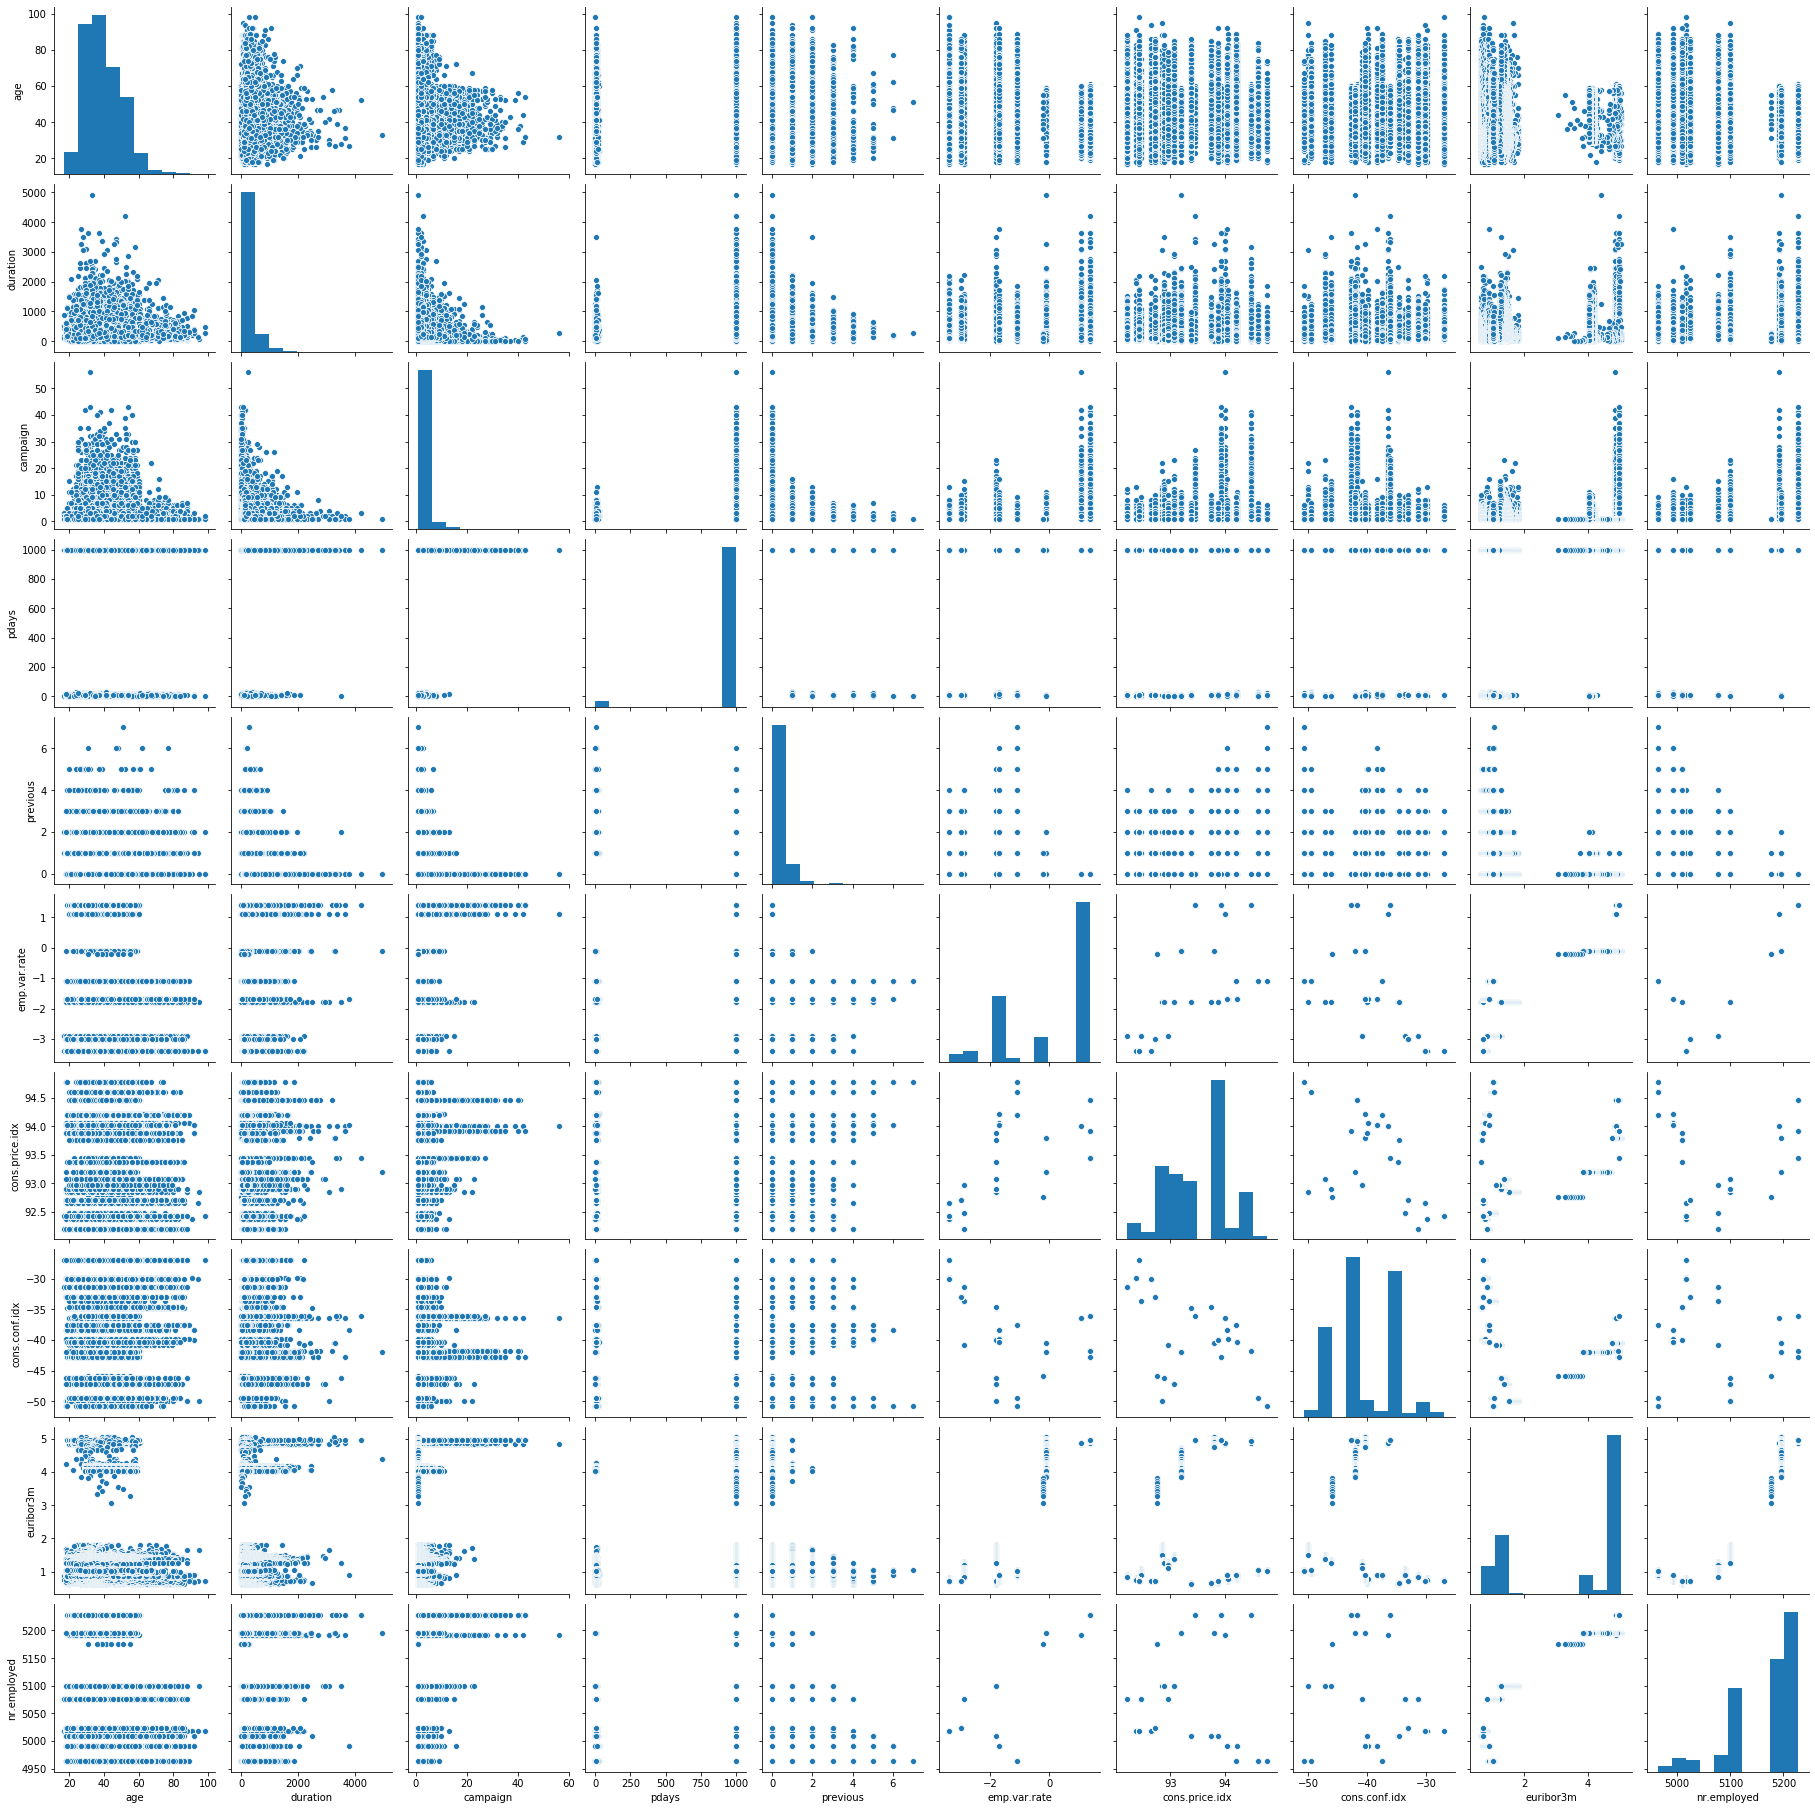

In [38]:
sns.pairplot(bank)

# .................................ENSEMBLE MODELLING...............................................

# 1.)  K-Nearest-Neighbor Algorithm

In [39]:
#loading dataset:-
df = pd.read_csv(r'C:/Users/swade/Desktop/verzeo/Bank.csv',sep = ";")

In [40]:
#Label Encoding:-
from sklearn.preprocessing import LabelEncoder     
le = LabelEncoder()

df['job1'] = le.fit_transform(df['job'])
df['education1'] = le.fit_transform(df['education'])
df['poutcome1'] = le.fit_transform(df['poutcome'])
df['housing1'] = le.fit_transform(df['housing'])
df['loan1'] = le.fit_transform(df['loan'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job1,education1,poutcome1,housing1,loan1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,3,0,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,7,3,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,7,3,1,2,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,7,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,5,5,1,2,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1,5,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,5,6,1,2,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,9,5,1,0,0


In [41]:
df.describe().columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job1',
       'education1', 'poutcome1', 'housing1', 'loan1'],
      dtype='object')

In [42]:
#Independent Variable:-
X = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job1','education1','poutcome1','housing1','loan1']].values
#Dependent Variable:-
Y = df[['y']].values

In [43]:
#splitting data into training and testing data:-
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=5)

In [44]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((30891, 15), (10297, 15), (30891, 1), (10297, 1))

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# training model on training data:-
knn.fit(X_train,Y_train)

C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting Test Set

In [47]:
y_pred = knn.predict(X_test)

In [48]:
accuracy_score(Y_test,y_pred)

0.9012333689424105

### By changing Number of neighbors

In [49]:
accuracy_scores = {}
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores[i] = accuracy_score(Y_test,y_pred)
    

C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

In [50]:
accuracy_scores

{1: 0.8842381276099834,
 2: 0.8940468097504127,
 3: 0.8987083616587356,
 4: 0.8983198989997087,
 5: 0.9012333689424105,
 6: 0.9034670292318151,
 7: 0.904243954549869,
 8: 0.9033699135670583,
 9: 0.9041468388851122,
 10: 0.9053122268621929,
 11: 0.9045353015441391,
 12: 0.9062833835097601,
 13: 0.9063804991745168,
 14: 0.9057006895212197}

#### Therefore, for 13 neighbors the accuracy score is highest(0.9063804991745168).

In [51]:
#Checking dataset balanced or not:-
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Here, the ratio is around 9:1 then, we can say data is not balanced.

### Balancing the dataset:-

In [52]:
y_df = df[df['y']=='yes']
not_y_df = df[df['y']=='no'][:4640]
df = y_df
df = df.append(not_y_df)

In [53]:
df.shape

(9280, 26)

In [54]:
df['y'].value_counts()

yes    4640
no     4640
Name: y, dtype: int64

In [55]:
#Independent Variable:-
X = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job1','education1','poutcome1','housing1','loan1']].values
#Dependent Variable:-
Y = df[['y']].values

In [56]:
#splitting data into training and testing data:-
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=5)

In [57]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6960, 15), (2320, 15), (6960, 1), (2320, 1))

In [58]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
# training model on training data:-
knn.fit(X_train,Y_train)

C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting Test Set

In [60]:
y_pred = knn.predict(X_test)

In [61]:
accuracy_score(Y_test,y_pred)

0.9607758620689655

In [62]:
accuracy_scores = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    accuracy_scores[i]=accuracy_score(Y_test,y_pred)

C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

In [63]:
accuracy_scores

{1: 0.9607758620689655,
 2: 0.9616379310344828,
 3: 0.9620689655172414,
 4: 0.9594827586206897,
 5: 0.9607758620689655,
 6: 0.9629310344827586,
 7: 0.9594827586206897,
 8: 0.9607758620689655,
 9: 0.9612068965517241}

#### So, due to balancing the data acurracy score of dataset increases to 0.9629310344827586 when neighbors is 6.

# 2.)  Random Forest Algorithm

In [64]:
#loading dataset:-
df=pd.read_csv(r'C:/Users/swade/Desktop/verzeo/Bank.csv',sep=';')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DBC8B34C8>,
      dtype=object)

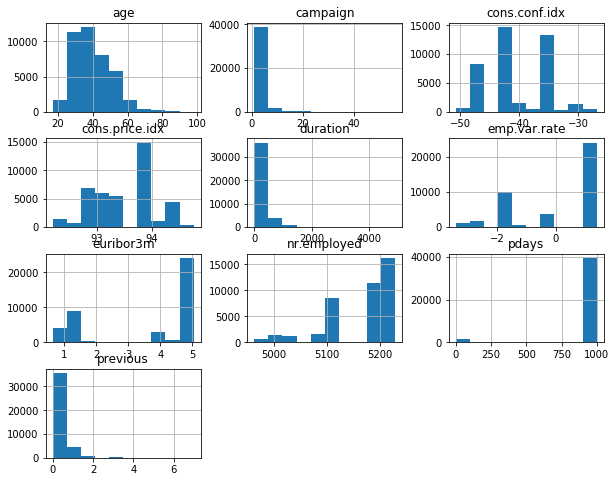

In [65]:
df.hist()

In [66]:
from sklearn.preprocessing import LabelEncoder         #Label Encoding
le = LabelEncoder()
df['job1'] = le.fit_transform(df['job'])
df['education1'] = le.fit_transform(df['education'])
df['poutcome1'] = le.fit_transform(df['poutcome'])
df['housing1'] = le.fit_transform(df['housing'])
df['loan1'] = le.fit_transform(df['loan'])

In [67]:
#Independent Variable:-
X = df[['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed','job1','education1','poutcome1','housing1','loan1']].values
#Dependent Variable:-
Y = df[['y']].values

In [68]:
#splitting data into training and testing data:-
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training model on training data:-
rfc.fit(X_train, Y_train)

C:\Users\swade\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      9187
         yes       0.47      0.30      0.37      1110

    accuracy                           0.89     10297
   macro avg       0.70      0.63      0.65     10297
weighted avg       0.87      0.89      0.88     10297



# 3.)  Logistic Regression

In [71]:
#loading dataset:-
df = pd.read_csv(r'C:/Users/swade/Desktop/verzeo/Bank.csv', sep = ";")

In [72]:
from sklearn.preprocessing import LabelEncoder          #Label Encoding
le = LabelEncoder()
df['job1'] = le.fit_transform(df['job'])
df['education1'] = le.fit_transform(df['education'])
df['poutcome1'] = le.fit_transform(df['poutcome'])
df['housing1'] = le.fit_transform(df['housing'])
df['loan1'] = le.fit_transform(df['loan'])

In [73]:
#Independent Variable:-
X = df[['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed','job1','education1','poutcome1','housing1','loan1']].values
#Dependent Variable:-
Y = df[['y']].values

In [74]:
#splitting data into training and testing data:-
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=42 )

In [75]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [76]:
# training model on training data:-
LogReg.fit(X_train,Y_train)

C:\Users\swade\New folder\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\swade\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting Test Set

In [77]:
y_pred = LogReg.predict(X_test)

In [78]:
accuracy_score(Y_test,y_pred)

0.8994852869767893

# 4.)  SUPPORT VECTOR MACHINE (SVM) Algorithm

In [79]:
from sklearn.preprocessing import LabelEncoder         #Label Encoding
le=LabelEncoder()
bank['Y']=le.fit_transform(bank['y'])
bank['job1'] = le.fit_transform(bank['job'])
bank['education1'] = le.fit_transform(bank['education'])
bank['poutcome1'] = le.fit_transform(bank['poutcome'])
bank['housing1'] = le.fit_transform(bank['housing'])
bank['loan1'] = le.fit_transform(bank['loan'])

In [80]:
bank['Y'].value_counts()

0    36548
1     4640
Name: Y, dtype: int64

In [81]:
#Balancing data:-
no=bank[bank['Y']==0][:4640]
yes=bank[bank['Y']==1]
bank=no
bank=bank.append(yes)

In [82]:
#Independent Variable:-
X=bank[[ 'age','job1','education1','poutcome1','duration','housing1','loan1','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].values
#Dependent variable:-
Y=bank['Y'].values

In [83]:
#splitting data into training and testing set:-
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [84]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6960, 15), (2320, 15), (6960,), (2320,))

In [85]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
y_pred=model.predict(X_test)

In [87]:
accuracy_score(Y_test,y_pred)

0.9568965517241379

In [88]:
from sklearn.metrics import precision_score
precision_score(Y_test,y_pred)

0.980072463768116

# ..................BUILDING ML ALGO FROM SCRATCH..........................................

## KNN ALGORITHM (Without using sklearn library)

In [89]:
bank1=bank.loc[:,[ 'age','duration','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','Y']]

In [90]:
import random
def splitdata(df,split,train=[],test=[]):  #Function for splitting data into training and testing set.
    for x in range(9280):
        if random.random() < split:
            for y in range(11):
                train.append(df.iloc[x,y])
        else:
            for y in range(11):
                test.append(df.iloc[x,y])

In [91]:
train=[]
test=[]
splitdata(bank1,0.70,train,test)

In [92]:
row_val1=(int)(len(train)/11)
row_val2=(int)(len(test)/11)

In [93]:
a=np.array(train) 
a=a.reshape(row_val1,11)
b=np.array(test)
b=b.reshape(row_val2,11)

In [94]:
a=np.array(train) 
a=a.reshape(row_val1,11)
b=np.array(test)
b=b.reshape(row_val2,11)

In [95]:
import math
def eucliddist(instance1,instance2,length): #Function for calculating Euclidean distance between two data points.
    dist=0                                  
    for x in range(length):
        dist+=pow((instance1[x]-instance2[x]),2)
    return math.sqrt(dist)

In [96]:
import operator
def getneighbors(training,testing,k):  #Function for selecting K nearest neighbours.
    dist=[]
    for x in range(row_val1):
        dis=eucliddist(testing,training[x],10)
        dist.append((training[x],dis))
    dist.sort(key=operator.itemgetter(1))
    neighbors=[]
    for x in range(k):
        neighbors.append(dist[x][0])
    return neighbors    

In [97]:
import operator
def getresponse(neigh):  #Function for selecting majority of similar data points from K nearest neighbours.
    maj={}
    for x in range(len(neigh)):
        response=neigh[x][-1]
        if response in maj:
            maj[response]+=1
        else:
            maj[response]=1
    sortedvote=sorted(maj.items(),key=operator.itemgetter(1),reverse=True)
    return sortedvote[0][0]

In [98]:
pred=[]                       #predicting target variable.
for x in range(row_val2):
    neighbors=getneighbors(a,b[x],3)
    result=getresponse(neighbors)
    pred.append(result)

In [99]:
def accuracy():  #Function for accuracy of model.
    total=0
    for x in range(2707):
        if b[x][-1]==pred[x]:
            total+=1
    return (total/row_val2)*100  

In [100]:
accuracy()

91.14950634696756

##  ...............................😊😊END OF ML-MAJOR-JUNE-PROJECT 😊😊.............................